/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<string>:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
/home/global/Anaconda3-2023.09/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<string>:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


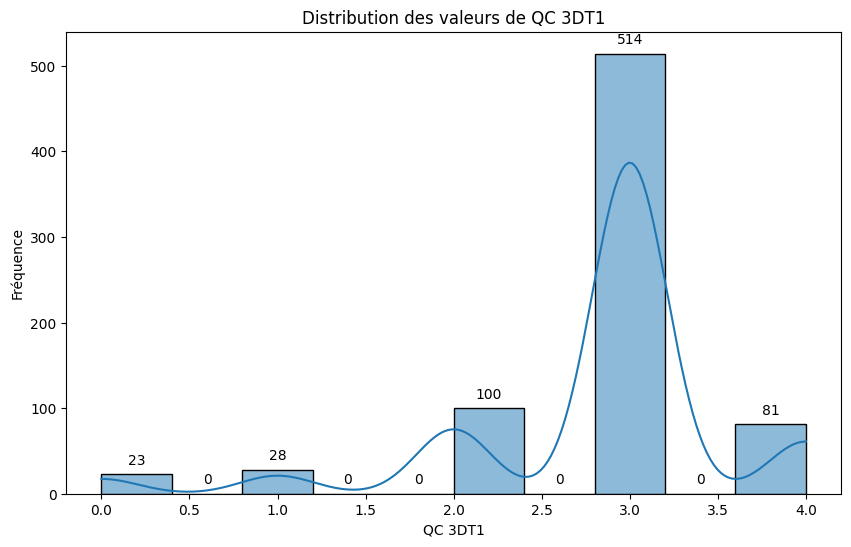

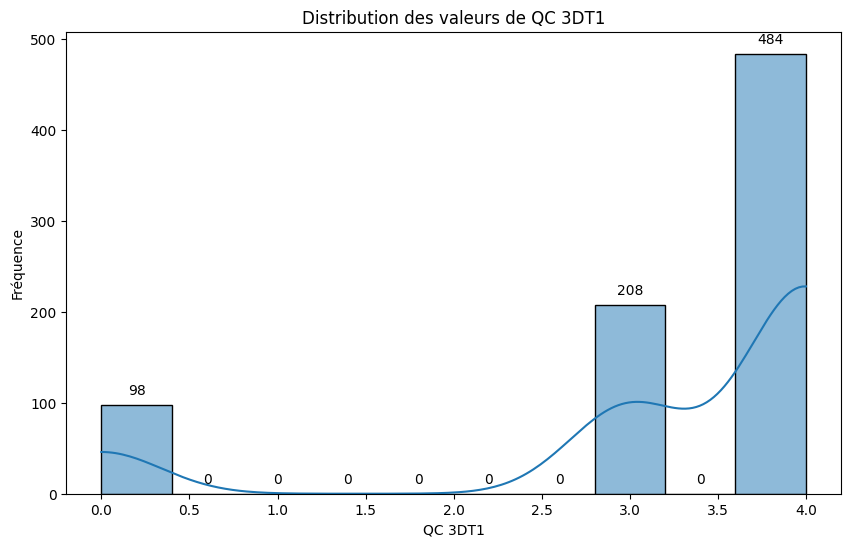

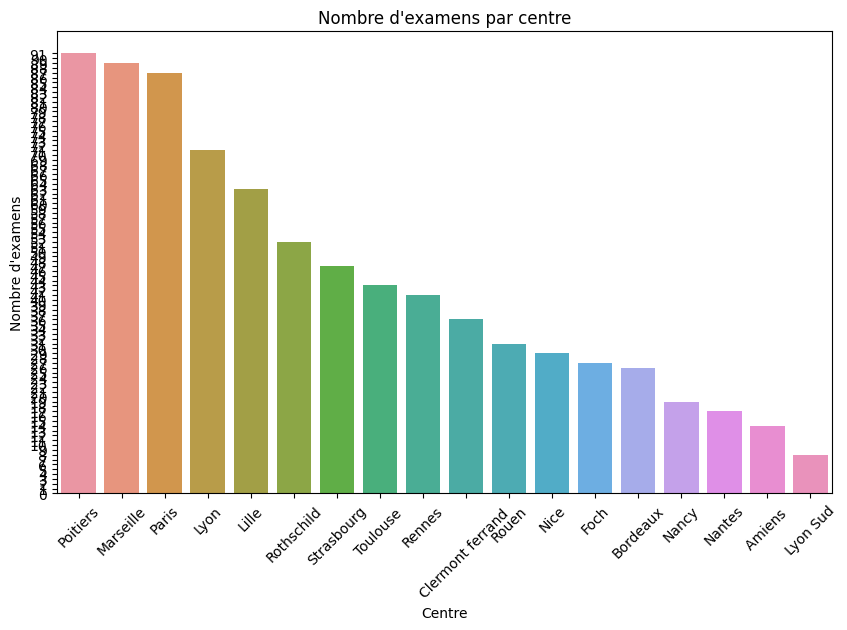

<Figure size 640x480 with 0 Axes>

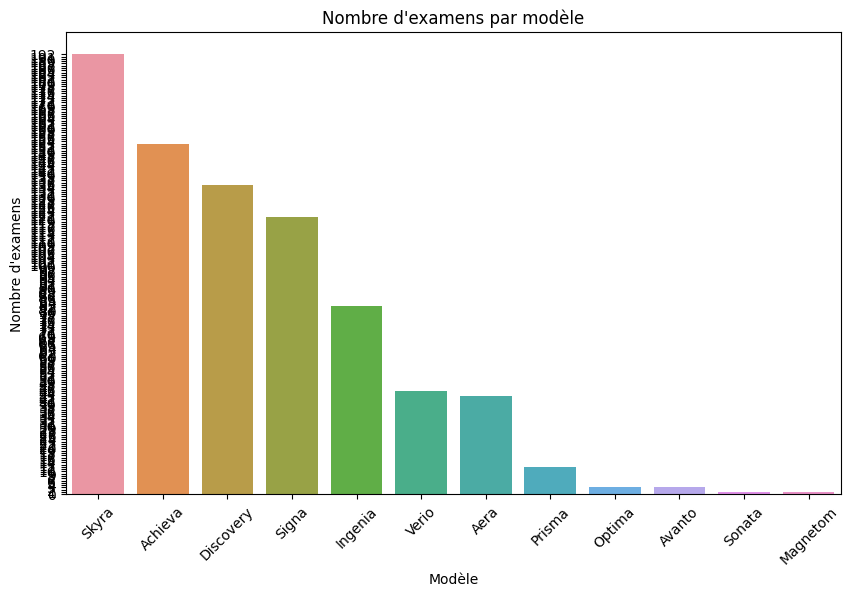

<Figure size 640x480 with 0 Axes>

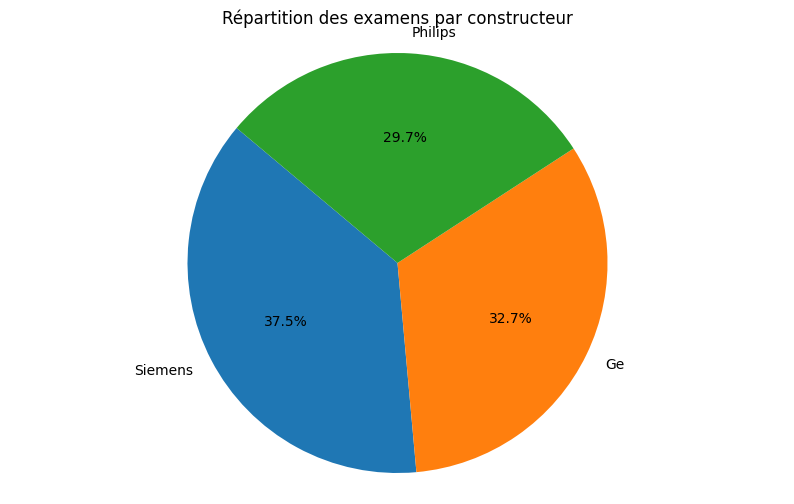

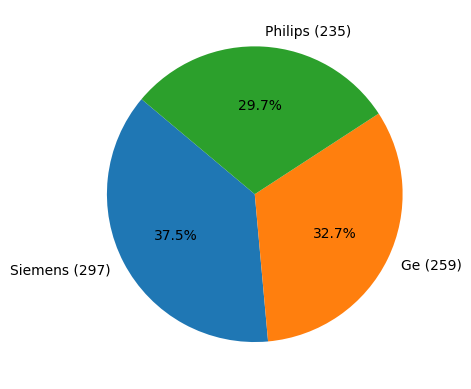

In [4]:
try:
    import import_ipynb
except :
    !pip install import_ipynb
    import import_ipynb
import Predistim_Library as pl

In [5]:
import os
import pandas as pd
from scipy.io import loadmat
import glob
from plotnine import ggplot, aes, geom_point, labs
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_errorbar, geom_line, geom_point, labs, theme_minimal

# read mat files for building a dataframe

In [6]:
# Chemin vers les fichiers
base_path = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/"
#file_pattern = "sub-*/mrGradT1only/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradT1only/mrGrad_t1overt2.mat"
#file_pattern = "sub-*/mrGradQSMoverR2/mrGrad_t1overt2.mat"
file_pattern = "sub-*/mrGradR2/mrGrad_t1overt2.mat"

# Récupérer les chemins des fichiers
# Ensure glob_files function exists and works correctly
try:
    file_paths = glob.glob(os.path.join(base_path, file_pattern), recursive=True)
except AttributeError as e:
    print(f"Error: {e}. Ensure 'glob_files' is implemented in 'Predistim_Library'.")
    file_paths = []  # Fallback to an empty list if there's an error

# Initialiser une liste pour stocker les données
data = []

# Parcourir les fichiers et charger les données
for file_path in file_paths:
    #subject_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  # Extraire le nom du sujet
    mat_data = loadmat(file_path)  # Charger le fichier .mat
    try:
        subject_names = str(mat_data['RG'][0][0]['subject_names'][0][0][0][0][0])
        print(subject_names)
        # Extract and store data with labels
        try:
            roi_label_0 = mat_data['RG'][0][0]['ROI_label'][0][0][0]
            roi_label_1 = mat_data['RG'][0][1]['ROI_label'][0][0][0]
            y_data_0 = np.array(mat_data['RG'][0][0]['Y'][0][0][0][0]).flatten()
            y_data_1 = np.array(mat_data['RG'][0][1]['Y'][0][0][0][0]).flatten()

            data.append({
                'subject_name': subject_names,
                f"{roi_label_0}_seg1": y_data_0[0],
                f"{roi_label_0}_seg2": y_data_0[1],
                f"{roi_label_0}_seg3": y_data_0[2],
                f"{roi_label_0}_seg4": y_data_0[3],
                f"{roi_label_0}_seg5": y_data_0[4],
                f"{roi_label_0}_seg6": y_data_0[5],
                f"{roi_label_0}_seg7": y_data_0[6],
                f"{roi_label_1}_seg1": y_data_1[0],
                f"{roi_label_1}_seg2": y_data_1[1],
                f"{roi_label_1}_seg3": y_data_1[2],
                f"{roi_label_1}_seg4": y_data_1[3],
                f"{roi_label_1}_seg5": y_data_1[4],
                f"{roi_label_1}_seg6": y_data_1[5],
                f"{roi_label_1}_seg7": y_data_1[6],
            })
        except KeyError as e:
            print(f"KeyError: {e}. Ensure 'ROI_label' and 'Y' exist in mat_data['RG'].")
    except KeyError as e:
        print(f"KeyError: {e}. 'subject_names' not found in mat_data['RG'].")
    #data.append({'subject_name': subject_name, 'data': mat_data})

# Créer un DataFrame
df = pd.DataFrame(data).set_index('subject_name')

# Clean index
df_cleaned = df.dropna()
df_cleaned.index = df_cleaned.index.str.replace("sub-", "", regex=False)
df_cleaned.index = df_cleaned.index.str.replace("_ses-M00", "", regex=False)
df_cleaned.index = df_cleaned.index.str.slice(0, 2).str.cat(df_cleaned.index.str.slice(2,-2), sep="-")

print(df_cleaned)

sub-01019LJ_ses-M00
sub-02065GJ_ses-M00
sub-02069VF_ses-M00
sub-02089SL_ses-M00
sub-02087TD_ses-M00
sub-05011VJ_ses-M00
sub-05024PM_ses-M00
sub-05023GV_ses-M00
sub-05030DN_ses-M00
sub-05034CM_ses-M00
sub-05036PJ_ses-M00
sub-06010FC_ses-M00
sub-06016RM_ses-M00
sub-06021RJ_ses-M00
sub-06025BI_ses-M00
sub-06034BS_ses-M00
sub-06029BN_ses-M00
sub-06078BS_ses-M00
sub-07015IA_ses-M00
sub-07019VJ_ses-M00
sub-07023LG_ses-M00
sub-07029SD_ses-M00
sub-07039FJ_ses-M00
sub-07055BC_ses-M00
sub-07053LJ_ses-M00
sub-07058PP_ses-M00
sub-07081LC_ses-M00
sub-07091MC_ses-M00
sub-07092DH_ses-M00
sub-07098CA_ses-M00
sub-08005DY_ses-M00
sub-08017DV_ses-M00
sub-08023LJ_ses-M00
sub-08028BC_ses-M00
sub-08036GE_ses-M00
sub-09018CT_ses-M00
sub-11028BA_ses-M00
sub-14024FP_ses-M00
sub-17010BG_ses-M00
sub-17020LP_ses-M00
sub-17024BR_ses-M00
sub-17022PG_ses-M00
sub-17030GR_ses-M00
sub-17032TJ_ses-M00
sub-17040MD_ses-M00
sub-17043MG_ses-M00
sub-17050PD_ses-M00
sub-17071PM_ses-M00
sub-18007BF_ses-M00
sub-18004MD_ses-M00


## Calcul de l'index Putamen_axis1_seg_asym

In [7]:
# Calculate asymmetry for each segment
n_segments=7
for seg in range(1, n_segments + 1):
    left = df_cleaned[f"Left-Putamen_seg{seg}"]
    right = df_cleaned[f"Right-Putamen_seg{seg}"]
    asym = (left - right) / ((left + right) / 2)
    df_cleaned[f"Putamen_axis1_seg{seg}_asym"] = asym



## Graphiques 

# Récuperer les valeurs UPDRS 

In [8]:
#1
df_msa = pd.read_excel(os.path.join(pl.STUDY_PATH, "csv_xlsx", "Romain_Juin2025.xlsx"), engine='openpyxl',sheet_name='UPDRSIII_COMPLET_V0')
print(df_msa.head())
df_msa.set_index("SUBJID", inplace=True)

#2
# Afficher toutes les colonnes contenant "DROIT" dans leur nom
droit_columns = df_msa.filter(regex="OF.*_.*DROIT", axis=1).columns
#print(len(droit_columns),droit_columns)

# Afficher toutes les colonnes contenant "DROIT" dans leur nom
gauche_columns = df_msa.filter(regex="OF.*_.*GCHE", axis=1).columns

df_msa['somme_droit'] = df_msa[droit_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['somme_gauche'] = df_msa[gauche_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)
df_msa['asymetry'] = df_msa['somme_droit'] - df_msa['somme_gauche']
df_msa['asymetry'].dropna(inplace=False)

                             SUBJID                            V12H_APRES  \
0  Subject Identifier for the Study  réalisation après 12h d'arret L-Dopa   
1                            01-001                                   Oui   
2                            01-002                                   Oui   
3                            01-003                                   Oui   
4                            01-004                                   Oui   

                                  DEMIVIE_AGONISTE                   H_LDOPA  \
0  réalisation après 5 demie-vies d'arret agoniste  heure de prise de L Dopa   
1                                              Oui                     09:00   
2                                              Oui                     09:47   
3                                               .K                     09:00   
4                                              Oui                     09:25   

       DOSE_LDOPA      OFF_H       ON_H15       ON_H30  

/tmp/ipykernel_3065754/965124861.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_3065754/965124861.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/tmp/ipykernel_3065754/965124861.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


SUBJID
Subject Identifier for the Study    0.0
01-001                              3.0
01-002                              1.0
01-003                              4.0
01-004                              2.0
                                   ... 
20-025                             -2.0
20-026                             -6.0
20-027                              2.0
20-028                              0.0
20-029                             -1.0
Name: asymetry, Length: 836, dtype: float64

In [38]:
# Update group labels to English
group_labels = ['Sum Right', 'Sum Left']

# Create the distribution plot with updated labels
fig = ff.create_distplot(data, group_labels, colors=['red', 'blue'])

# Update layout
fig.update_layout(
    title="Distribution of Sum Right and Sum Left",
    xaxis_title="Values",
    yaxis_title="Density"
)

fig.show()

# Create a histogram for the asymmetry column
fig_asym = ff.create_distplot([df_msa['asymetry'].dropna()], ['Asymmetry'], colors=['green'])

# Update layout with English labels
fig_asym.update_layout(
    title="Distribution of Asymmetry",
    xaxis_title="Values",
    yaxis_title="Density"
)

fig_asym.show()


NameError: name 'ff' is not defined

In [19]:
# Calculate pp asymmetry for segments 5 to 7
pp_segments = [f"Putamen_axis1_seg{seg}_asym" for seg in range(5, 8)]
print(pp_segments)
df_cleaned["pp_asym"] = df_cleaned[pp_segments].mean(axis=1)
print(df_cleaned[pp_segments].mean(axis=1))

# Obtenir l'intersection des indices
intersection_index = df_cleaned.index.intersection(df_msa.index)

# Créer un DataFrame avec les données communes
df_intersection = pd.DataFrame({
    'T1overT2_asymetry_seg': df_cleaned.loc[intersection_index, 'pp_asym'],
    'motor_symptom_asymetry': df_msa.loc[intersection_index, 'asymetry']
})
df_intersection.dropna(inplace=True)
print(df_intersection)

['Putamen_axis1_seg5_asym', 'Putamen_axis1_seg6_asym', 'Putamen_axis1_seg7_asym']
subject_name
01-019    0.018758
02-065    2.000000
02-069    1.077738
02-089   -0.090388
02-087   -0.121045
            ...   
01-048   -0.222774
07-037   -0.025584
02-046    1.786037
05-022    0.015477
19-051    0.004926
Length: 381, dtype: float64
        T1overT2_asymetry_seg  motor_symptom_asymetry
01-019               0.018758                    -2.0
02-065               2.000000                    -9.0
02-069               1.077738                    -2.0
02-089              -0.090388                     4.0
02-087              -0.121045                    -1.0
...                       ...                     ...
01-048              -0.222774                     5.0
07-037              -0.025584                    -8.0
02-046               1.786037                    -4.0
05-022               0.015477                    -1.0
19-051               0.004926                     2.0

[364 rows x 2 colum

In [23]:
#df_intersection_filtered = df_intersection[df_intersection.index.str.startswith("01-")]
import statsmodels.api as sm

import plotly.express as px


# Filter out subjects with T1overT2_asymetry_seg greater than 100
df_intersection = df_intersection[df_intersection['T1overT2_asymetry_seg'] <= 50]

# Create groups based on the first two characters of the index
df_intersection['Group'] = df_intersection.index.str.slice(0, 2)

# Filter out rows where motor_symptom_asymetry is greater than 1 or less than -1
#df_intersection = df_intersection[(df_intersection['motor_symptom_asymetry'] <= 1) & (df_intersection['motor_symptom_asymetry'] >= -1)]
# Create an interactive scatter plot with Plotly
fig = px.scatter(
    df_intersection,
    y='motor_symptom_asymetry',
    x='T1overT2_asymetry_seg',
    color='Group',  # Use 'Group' column to assign colors
    hover_name=df_intersection.index,
    labels={
        'T1overT2_asymetry_seg': 'T1overT2 Asymmetry',
        'motor_symptom_asymetry': 'Motor Symptom Asymmetry'
    },
    title="Interactive Scatter Plot of T1overT2 Asymmetry vs Motor Symptom Asymmetry"
)

#Ajouter les axes x=0 et y=0 en gris pointillé
fig.add_shape(
    type="line",
    x0=df_intersection['T1overT2_asymetry_seg'].min(),
    x1=df_intersection['T1overT2_asymetry_seg'].max(),
    y0=0, y1=0,
    line=dict(color="gray", dash="dot")
)

fig.add_shape(
    type="line",
    x0=0, x1=0,
    y0=df_intersection['motor_symptom_asymetry'].min(),
    y1=df_intersection['motor_symptom_asymetry'].max(),
    line=dict(color="gray", dash="dot")
)

# Calculer la droite de régression
X = df_intersection['T1overT2_asymetry_seg']
y = df_intersection['motor_symptom_asymetry']
X = sm.add_constant(X)  # Ajouter une constante pour le modèle
model = sm.OLS(y, X).fit()
df_intersection['regression_line'] = model.predict(X)

# Ajouter la droite de régression au graphique
fig.add_trace(
    px.line(
        df_intersection,
        x='T1overT2_asymetry_seg',
        y='regression_line'
    ).data[0]
)
# Calculer le R² et la p-value
r_squared = model.rsquared
p_value = model.pvalues.iloc[1]

# Afficher les résultats
print(f"R²: {r_squared:.4f}")
print(f"P-value: {p_value:.4e}")

fig.write_image("/NAS/deathrow/protocoles/predistim/screenshots/scatter_R2_vs_motor_symptom_asymmetry.png")

fig.show()

R²: 0.0005
P-value: 6.6469e-01


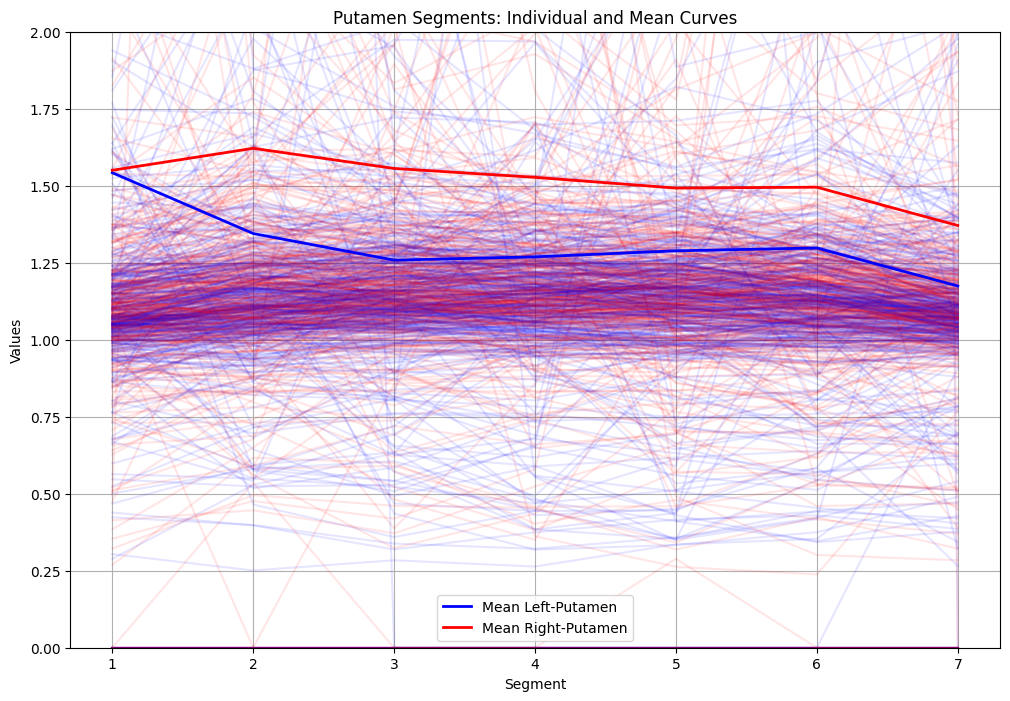

In [25]:
plt.figure(figsize=(12, 8))

# Tracer les courbes transparentes pour chaque sujet
for subject in df_cleaned.index:
    plt.plot(range(1, len(left_columns) + 1), df_cleaned.loc[subject, left_columns], color='blue', alpha=0.1)
    plt.plot(range(1, len(right_columns) + 1), df_cleaned.loc[subject, right_columns], color='red', alpha=0.1)

# Tracer les moyennes en bleu et rouge foncé
plt.plot(range(1, len(left_columns) + 1), df_cleaned[left_columns].mean(), color='blue', label='Mean Left-Putamen', linewidth=2)
plt.plot(range(1, len(right_columns) + 1), df_cleaned[right_columns].mean(), color='red', label='Mean Right-Putamen', linewidth=2)

# Ajouter les labels et la légende
plt.title('Putamen Segments: Individual and Mean Curves')
plt.xlabel('Segment')
plt.ylabel('Values')
plt.xticks(range(1, len(left_columns) + 1))
plt.legend()
plt.grid(True)

plt.ylim(0, 2)


# Set y-axis limits
#plt.ylim(-500, 500)
plt.ylim(0, 2)

fig.write_image("/NAS/deathrow/protocoles/predistim/screenshots/R2LinesPlot4AllSubjs.png")

# Afficher le graphique
plt.show()


In [ ]:
import os
import glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Chemin vers le répertoire contenant les données des patients
base_dir = "/NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2"

# Créer un fichier PDF pour sauvegarder les figures
pdf_filename = os.path.join(base_dir, "negatoscope_figures_R2.pdf")
with PdfPages(pdf_filename) as pdf:
    # Parcourir les répertoires des patients
    for patient_dir in glob.glob(os.path.join(base_dir, "sub-010*")):
        patient_id = os.path.basename(patient_dir)

        # Chemins des fichiers pour le patient actuel
        #t1overt2_file = os.path.join(patient_dir, "t1overt2_norm_PSR.nii.gz")
        #t1overt2_file = os.path.join(patient_dir, "QSMoverR2_norm_PSR.nii.gz")
        t1overt2_file = os.path.join(patient_dir, "r2_norm_PSR.nii.gz")
        left_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii")
        right_seg_file = os.path.join(patient_dir, "mrGrad", "mrGradSeg", "subjectgroup_1", patient_id, "mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii")

        print(f"freeview -layout 1 -viewport axial {t1overt2_file}:grayscale=0,10 {right_seg_file}:colormap=lut:opacity=0.5 {left_seg_file}:colormap=lut:opacity=0.5;")
        # Vérifier si les fichiers existent
        if not all(os.path.exists(f) for f in [t1overt2_file, left_seg_file, right_seg_file]):
            print(f"Fichiers manquants pour le patient {patient_id}, passage au suivant.")
            continue

        # Lire les images NIfTI
        t1overt2_img = nib.load(t1overt2_file)
        t1overt2_data = t1overt2_img.get_fdata()

        left_seg_img = nib.load(left_seg_file)
        left_seg_data = left_seg_img.get_fdata()

        right_seg_img = nib.load(right_seg_file)
        right_seg_data = right_seg_img.get_fdata()

        # Créer une figure pour le patient actuel
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))



        # Créer une table de couleurs pour les segmentations
        colors = cm.tab20(np.linspace(0, 1, 20))
        cmap = ListedColormap(colors)

        # Afficher l'image T1/T2 en niveaux de gris
        slice_idx = np.argmax(np.sum(left_seg_data, axis=(0, 2)))  # Trouver la slice avec la plus grande intégrale

        # Afficher les segmentations avec la table de couleurs et une transparence
        left_seg_slice = left_seg_data[:, slice_idx,:].T
        right_seg_slice = right_seg_data[:, slice_idx,:].T

        # Combiner les segmentations gauche et droite
        combined_seg_slice = left_seg_slice + right_seg_slice
        combined_seg_slice = np.where(combined_seg_slice > 0, combined_seg_slice, 0)

        min_val = np.percentile(t1overt2_data[:, slice_idx, :], 5)
        max_val = np.percentile(t1overt2_data[:, slice_idx, :], 95)
        ax.imshow(t1overt2_data[:, slice_idx, :].T, cmap='gray', origin='lower', aspect='auto', vmin=min_val, vmax=max_val)
        ax.imshow(combined_seg_slice, cmap=cmap, origin='lower', alpha=0.8, aspect='auto')

        # Ajouter un titre avec l'ID du patient
        ax.set_title(f"Patient: {patient_id}")
        ax.axis('off')
        
        #plt.show()
        # Ajouter la figure au PDF
        pdf.savefig(fig, bbox_inches='tight')
        plt.close(fig)

print(f"PDF sauvegardé sous le nom : {pdf_filename}")


freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01013PR_ses-M00/r2_norm_PSR.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01013PR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01013PR_ses-M00/mrGradSeg_t1overt2_right-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01013PR_ses-M00/mrGrad/mrGradSeg/subjectgroup_1/sub-01013PR_ses-M00/mrGradSeg_t1overt2_left-putamen_axis1_7segments.nii:colormap=lut:opacity=0.5;
Fichiers manquants pour le patient sub-01013PR_ses-M00, passage au suivant.
freeview -layout 1 -viewport axial /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1overT2/sub-01019LJ_ses-M00/r2_norm_PSR.nii.gz:grayscale=0,10 /NAS/deathrow/protocoles/predistim/20250707-120649_MAD_pdt2se/derivatives/mrGRAD_T1ove